In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


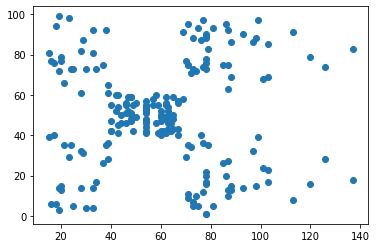

In [5]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

In [12]:
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

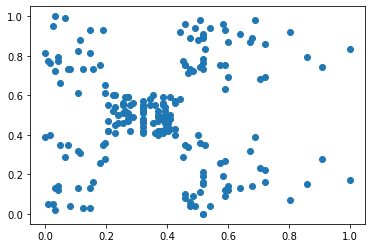

In [13]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

# The column spending score and Annual income is ranging between 0 to 1 by using MINMAXSCALAR

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [36]:
x = df.iloc[:,[3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [37]:
from sklearn.cluster import KMeans

In [38]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [39]:
wcss[:5]

[23.040720326039906,
 13.993505283127979,
 9.058985215159455,
 6.110312266413655,
 3.583117905952559]

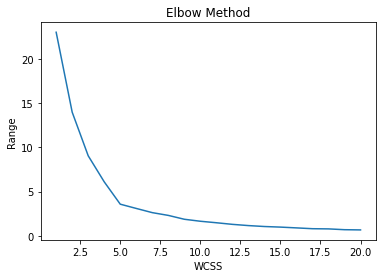

In [40]:
k_range =range(1,21)
plt.plot(k_range,wcss)
plt.xlabel('WCSS')
plt.ylabel('Range')
plt.title('Elbow Method')
plt.show()

In [41]:
k_mean = KMeans(n_clusters=5)
k_mean

KMeans(n_clusters=5)

In [43]:
label_predicted = k_mean.fit_predict(x)
label_predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [44]:
df['Label_or_predicted'] = label_predicted

In [45]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label_or_predicted
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,3
5,6,Female,22,0.016393,0.765306,4
6,7,Female,35,0.024590,0.051020,3
7,8,Female,23,0.024590,0.948980,4
8,9,Male,64,0.032787,0.020408,3
9,10,Female,30,0.032787,0.724490,4


In [46]:
d_1 = df[df['Label_or_predicted'] == 0]
d_2 = df[df['Label_or_predicted'] == 1]
d_3 = df[df['Label_or_predicted'] == 2]
d_4 = df[df['Label_or_predicted'] == 3]
d_5 = df[df['Label_or_predicted'] == 4]

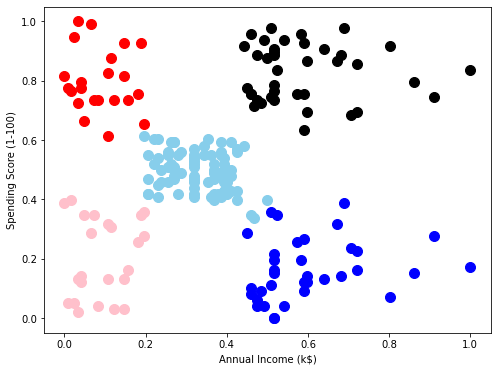

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'], c='black', s = 100, label = 'cluster_1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'], c='blue', s = 100, label = 'cluster_2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'], c='skyblue', s = 100, label = 'cluster_3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'], c='pink', s = 100, label = 'cluster_5')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'], c='red', s = 100, label = 'cluster_6')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [55]:
k_mean.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894]])

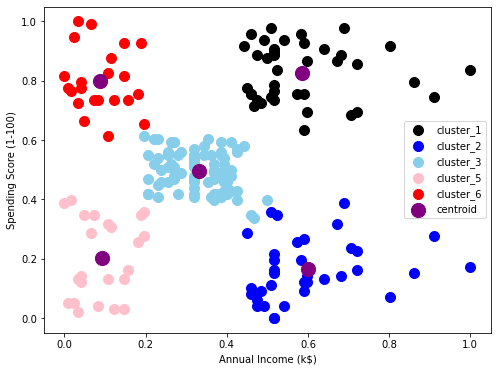

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'], c='black', s = 100, label = 'cluster_1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'], c='blue', s = 100, label = 'cluster_2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'], c='skyblue', s = 100, label = 'cluster_3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'], c='pink', s = 100, label = 'cluster_5')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'], c='red', s = 100, label = 'cluster_6')

plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1], c= 'purple', s= 200, label = 'centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()